# Rad sa skupom podataka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# učitavanje skupa podataka
df = pd.read_excel('C:/Users/delic/Downloads/products_set_labeled (1).xlsx')
df.head()


,1,apple iphone 8 plus 64gb silver,1.1,1.2,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
0,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [3]:
print("Početni skup podataka ima ukupno ", len(df), "redova")

Početni skup podataka ima ukupno  35310 redova


Dodajmo nazive kolonama, prema specifikacijama oni slijede

In [4]:
df.columns = ["product_id", "product_title", "vendor_id", "cluster_id", "cluster_label", "category_id", "category_label"]

 Prikažimo prvih nekoliko redova

In [5]:
df.head()

,product_id,product_title,vendor_id,cluster_id,cluster_label,category_id,category_label
0,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [6]:
print(len(df))

35310


Izbacimo neke od kolona koje nam sigurno neće trebat. Kasnije ćemo izbaciti još nekoliko, koje nam za krajnji skup podataka neće bit potrebne. Ipak, u koraku pretporocesiranja ćemo ih koristiti radi blage optimizacije brzine poređenja

In [7]:
#df.drop(columns=['product_id', 'vendor_id', 'cluster_id', 'category_id'], axis=1, inplace=True)  
df.drop(columns=['product_id', 'vendor_id'], axis=1, inplace=True)  

Prikažimo ponovo prvih par redova novodobijenog skupa podataka

In [8]:
df.head()

,product_title,cluster_id,cluster_label,category_id,category_label
0,apple iphone 8 plus 64 gb spacegrau,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,apple iphone 8 plus 64gb space grey,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


Trenutni skup podataka označava samo poklapanja. Tako da možemo uvesti binarnu varijablu poklapanja i postavit je na true. Ovo radimo jer ćemo kasnije dodati i netačna poklapanja u koraku proširivanja skupa podataka

In [9]:
df['is_match'] = 1

Broj kolona se povećao za jedan. Ispišimo prvih par redova, da se uvjerimo da je promjena primljena

In [10]:
df.head()

,product_title,cluster_id,cluster_label,category_id,category_label,is_match
0,apple iphone 8 plus 64 gb spacegrau,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1
1,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1
2,apple iphone 8 plus 64gb space grey,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1
3,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1


In [11]:
print(len(df))

35310


Kreirajmo sad funkciju za proširenje skupa podataka. Bez umanjenja opštosti, skup podataka ćemo proširiti za 100%, odnosno proširit ćemo ga za 35310 redova. Proširenje ćemo izvršiti tako što ćemo svaki product_title povezati sa drugom kataloškom oznakom, ali koja pripada istoj kategoriji. Ovdje nam koriste category_id i cluster_id koje ranije nismo dropali. kataloška vrijednost se bira nasumično iz odgovarajuće kategorije

In [12]:
# https://stackoverflow.com/a/48368668
def create_false_connections():
    false_matches = []
    
    for i in range(len(df)):
        row = df.loc[i]
        
        does_not_match = df[(df['category_id'] == row['category_id']) & 
                        (df['cluster_id'] != row['cluster_id'])].sample(1)

        
            
        false_matches.append({
                'product_title': row['product_title'],
                'cluster_id': does_not_match['cluster_id'].values[0], 
                'cluster_label': does_not_match['cluster_label'].values[0],  
                'category_id': row['category_id'],
                'category_label': row['category_label'],
                'is_match': 0
            })
    
    return pd.DataFrame(false_matches)



pozovimo funkciju i uvjerimo se u ispravnost novodobijenog skupa podataka. Potom ga spojimo sa početnim

In [13]:
test = pd.DataFrame()
test = create_false_connections()

In [14]:
test.head()

,product_title,cluster_id,cluster_label,category_id,category_label,is_match
0,apple iphone 8 plus 64 gb spacegrau,441,Blackberry Torch 9810,2612,Mobile Phones,0
1,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,1086,Doogee X9 Mini Dual SIM,2612,Mobile Phones,0
2,apple iphone 8 plus 64gb space grey,222,Google Pixel 2 128GB,2612,Mobile Phones,0
3,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,7,Apple iPhone X 256GB,2612,Mobile Phones,0
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,272,Alcatel 3c Dual SIM,2612,Mobile Phones,0


In [15]:
mixed_df = pd.DataFrame()
mixed_df = pd.concat([df, test])

Tokom spajanja ovi podaci su smješteni na dno starog dataframe- a. Tako uvjerfimo se u ispravnost spajanja ispisom posljednjih par redova. 

In [16]:
mixed_df.tail()

,product_title,cluster_id,cluster_label,category_id,category_label,is_match
35305,smeg fab28 60cm retro style right hand hinge f...,46582,Liebherr IK1950 Integrated,2623,Fridges,0
35306,smeg fab28 60cm retro style left hand hinge fr...,47491,Indesit INTSZ1611,2623,Fridges,0
35307,smeg fab28 60cm retro style left hand hinge fr...,46336,Beko LSG1545DW White,2623,Fridges,0
35308,candy 60cm built under larder fridge cru160nek,46429,Amica UC150.3 Integrated,2623,Fridges,0
35309,neff k4316x7gb built under larder fridge,46215,Gorenje OBRB153R Red,2623,Fridges,0


In [17]:
print("Da je skup podataka proširen za 100% uvjeravamo se računanjem dužine novog skupa podataka: ",len(mixed_df))

Da je skup podataka proširen za 100% uvjeravamo se računanjem dužine novog skupa podataka:  70620


Kreiramo još jedno proširenje na način da biramo iz druge kategorije ali i kataloške oznake. Ukoliko stavimo da je kategorija različita, time je i kataloška oznaka različita i taj uslov nema potrebe provjeravati. Proširenje, pozivanje i ispis je analogno, te se neće dodatno opisivati. 

In [18]:
def create_false_connections_different_category():
    false_matches = []
    
    for i in range(len(df)):
        row = df.loc[i]
        
        does_not_match = df[(df['category_id'] != row['category_id'])].sample(1)

        
            
        false_matches.append({
                'product_title': row['product_title'],
                'cluster_id': does_not_match['cluster_id'].values[0], 
                'cluster_label': does_not_match['cluster_label'].values[0],  
                'category_id': does_not_match['category_id'].values[0],
                'category_label': does_not_match['category_label'].values[0],
                'is_match': 0
            })
    
    return pd.DataFrame(false_matches)



In [19]:
test = pd.DataFrame()
test = create_false_connections_different_category()

In [20]:
test.head()

,product_title,cluster_id,cluster_label,category_id,category_label,is_match
0,apple iphone 8 plus 64 gb spacegrau,40547,Indesit DSR15BK Black,2619,Dishwashers,0
1,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,6469,Intel Xeon E5-4655 v3 2.9GHz Tray,2615,CPUs,0
2,apple iphone 8 plus 64gb space grey,4880,Panasonic TX-43FXW654S,2614,TVs,0
3,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,45454,Amica EKGC 16156 Integrated,2622,Fridge Freezers,0
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5940,Intel Xeon E3-1245 V6 3.7GHz Box,2615,CPUs,0


In [21]:
print(len(test))

35310


Dodan je trenutni dataframe iz razloga što nije smisleno raći npr. a = a + 1. Iako bi ovo radilo, prirodnije je b = a, a = b + 1

In [22]:
temp_df = pd.DataFrame()
temp_df = pd.concat([mixed_df, test])

In [23]:
print(len(temp_df))

105930


In [24]:
mixed_df = temp_df

In [25]:
print(len(mixed_df))

105930


In [26]:
print(mixed_df.all() == temp_df.all())

product_title     True
cluster_id        True
cluster_label     True
category_id       True
category_label    True
is_match          True
dtype: bool


In [27]:
mixed_df.head()

,product_title,cluster_id,cluster_label,category_id,category_label,is_match
0,apple iphone 8 plus 64 gb spacegrau,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1
1,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1
2,apple iphone 8 plus 64gb space grey,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1
3,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,1


In [28]:
mixed_df.tail()

,product_title,cluster_id,cluster_label,category_id,category_label,is_match
35305,smeg fab28 60cm retro style right hand hinge f...,39308,Canon IXUS 160,2617,Digital Cameras,0
35306,smeg fab28 60cm retro style left hand hinge fr...,7237,HP AMD Opteron 6166HE 1.8GHz Socket G34 6400MH...,2615,CPUs,0
35307,smeg fab28 60cm retro style left hand hinge fr...,6252,Intel Xeon E5-1620V2 3.7GHz Tray,2615,CPUs,0
35308,candy 60cm built under larder fridge cru160nek,40878,Bosch SMI68TS06E Stainless Steel,2619,Dishwashers,0
35309,neff k4316x7gb built under larder fridge,599,LG X Cam,2612,Mobile Phones,0


Uklonimo i ostatak kolona is dataFrame- a koje nam nisu potrebne, odnosno karakteristike koje nećemo koristiti u treningu. 

In [29]:
mixed_df.drop(columns=['cluster_id', 'category_id'], axis=1, inplace=True)  


In [30]:
mixed_df.tail()

,product_title,cluster_label,category_label,is_match
35305,smeg fab28 60cm retro style right hand hinge f...,Canon IXUS 160,Digital Cameras,0
35306,smeg fab28 60cm retro style left hand hinge fr...,HP AMD Opteron 6166HE 1.8GHz Socket G34 6400MH...,CPUs,0
35307,smeg fab28 60cm retro style left hand hinge fr...,Intel Xeon E5-1620V2 3.7GHz Tray,CPUs,0
35308,candy 60cm built under larder fridge cru160nek,Bosch SMI68TS06E Stainless Steel,Dishwashers,0
35309,neff k4316x7gb built under larder fridge,LG X Cam,Mobile Phones,0


In [31]:
mixed_df.head()

,product_title,cluster_label,category_label,is_match
0,apple iphone 8 plus 64 gb spacegrau,Apple iPhone 8 Plus 64GB,Mobile Phones,1
1,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Apple iPhone 8 Plus 64GB,Mobile Phones,1
2,apple iphone 8 plus 64gb space grey,Apple iPhone 8 Plus 64GB,Mobile Phones,1
3,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Apple iPhone 8 Plus 64GB,Mobile Phones,1
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Apple iPhone 8 Plus 64GB,Mobile Phones,1


In [32]:
print(len(mixed_df.columns))

4


### Broj jedinstvenih vrijednosti u konačnom skupu podataka

Kako smo kasnije kreirali vještačke podatke (kombinacijom već postojećih), vrijedno je napomenuti da su jedinstveni podaci također identični jedinstvenim podacima iz početnog skupa podataka

In [33]:
no_product_title_distinct = mixed_df['product_title'].nunique()
no_cluster_label_distinct = mixed_df['cluster_label'].nunique()
no_category_label_distinct = mixed_df['category_label'].nunique()
no_is_match_distinct = mixed_df['is_match'].nunique()



In [34]:
print("broj jedinstvenih naslova u skupu podataka je: ", no_product_title_distinct)
print("broj jedinstvenih kataloških naslova u skupu podataka je: ", no_cluster_label_distinct)
print("broj jedinstvenih kategiroja u skupu podataka je: ", no_category_label_distinct)
print("broj stanja koja se mogu klasifikovat je 2, kako je problem bin klasifikacija. Ipak provjerimo u datasetu: ", no_is_match_distinct)

broj jedinstvenih naslova u skupu podataka je:  30992
broj jedinstvenih kataloških naslova u skupu podataka je:  12849
broj jedinstvenih kategiroja u skupu podataka je:  10
broj stanja koja se mogu klasifikovat je 2, kako je problem bin klasifikacija. Ipak provjerimo u datasetu:  2


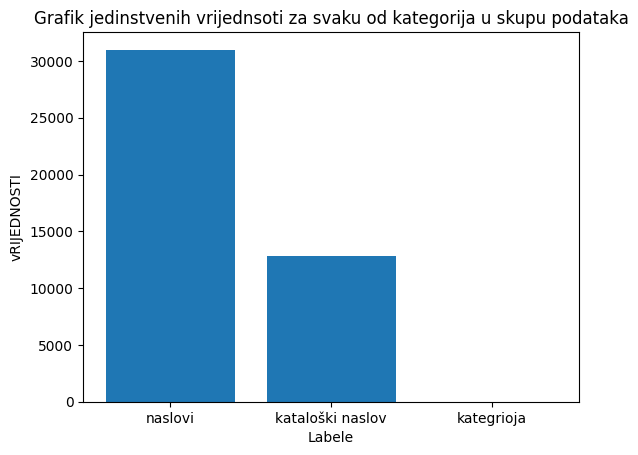

In [35]:
plt.bar(["naslovi", "kataloški naslov", "kategrioja"],[no_product_title_distinct, no_cluster_label_distinct, no_category_label_distinct])
plt.xlabel('Labele')
plt.ylabel('vRIJEDNOSTI')
plt.title('Grafik jedinstvenih vrijednsoti za svaku od kategorija u skupu podataka')
plt.show()


In [36]:
no_product_title_total = mixed_df['product_title'].count()
no_cluster_label_total = mixed_df['cluster_label'].nunique()
no_category_label_total = mixed_df['category_label'].nunique()
no_is_match_total = mixed_df['is_match'].nunique()



In [37]:
print("ukupni broj u skupu podataka je: ", no_product_title_total)
print("ali oni se i dalje mapiraju u ", no_cluster_label_total," kataloških naslova" )
print("Također, i broj kategorija i dalje je: ", no_category_label_total)
print("I binarnost klasifikacije je zadržana. Ipak provjerimo u datasetu: ", no_is_match_total)

ukupni broj u skupu podataka je:  105930
ali oni se i dalje mapiraju u  12849  kataloških naslova
Također, i broj kategorija i dalje je:  10
I binarnost klasifikacije je zadržana. Ipak provjerimo u datasetu:  2


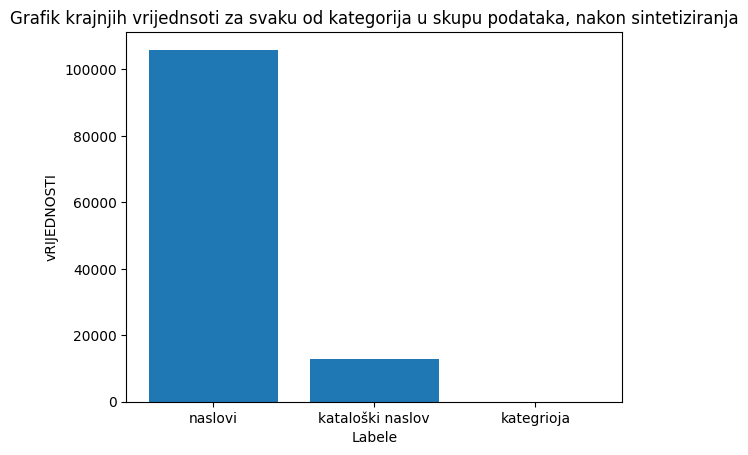

In [38]:
plt.bar(["naslovi", "kataloški naslov", "kategrioja"],[no_product_title_total, no_cluster_label_total, no_category_label_total])
plt.xlabel('Labele')
plt.ylabel('vRIJEDNOSTI')
plt.title('Grafik krajnjih vrijednsoti za svaku od kategorija u skupu podataka, nakon sintetiziranja')
plt.show()


In [39]:
labels=[]

for i in range(len(mixed_df.columns)):
    labels.append(mixed_df.columns[i])
print(labels)


['product_title', 'cluster_label', 'category_label', 'is_match']


# Implementacija modela u nastavku

In [40]:
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
import torch


C:\Users\delic\anaconda3\envs\master\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [41]:
mixed_df.head

<bound method NDFrame.head of                                            product_title  \
0                    apple iphone 8 plus 64 gb spacegrau   
1      apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
2                    apple iphone 8 plus 64gb space grey   
3      apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   
4      apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   
...                                                  ...   
35305  smeg fab28 60cm retro style right hand hinge f...   
35306  smeg fab28 60cm retro style left hand hinge fr...   
35307  smeg fab28 60cm retro style left hand hinge fr...   
35308     candy 60cm built under larder fridge cru160nek   
35309           neff k4316x7gb built under larder fridge   

                                           cluster_label   category_label  \
0                               Apple iPhone 8 Plus 64GB    Mobile Phones   
1                               Apple iPhone 8 Plus 64GB    Mobile Phones   
2                 

In [42]:
#funkcija za izvlačenje kolona iz svakog reda. 
def extract_col(X, i):
    col=[]
    for row in X:
        col.append(row[i])
    return col

samo će prve dvije kolone činiti karakteristike skupa podataka za obuku, test i validaciju. Pravimo matricu [nx2] gdje je n broj redova koje ima kombinovani dataframe. To bi trebalo biti 35k+35k+35k ~ 105k redova

In [43]:
X = mixed_df[["product_title", "cluster_label"]].values

In [44]:
print(X)

[['apple iphone 8 plus 64 gb spacegrau' 'Apple iPhone 8 Plus 64GB']
 ['apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim free smartphone in gold'
  'Apple iPhone 8 Plus 64GB']
 ['apple iphone 8 plus 64gb space grey' 'Apple iPhone 8 Plus 64GB']
 ...
 ['smeg fab28 60cm retro style left hand hinge fridge with icebox pink'
  'Intel Xeon E5-1620V2 3.7GHz Tray']
 ['candy 60cm built under larder fridge cru160nek'
  'Bosch SMI68TS06E Stainless Steel']
 ['neff k4316x7gb built under larder fridge' 'LG X Cam']]


In [45]:
print(len(mixed_df))

105930


Izvlačimo kao labelu, odnosno temeljnu istinu vrijednost posljednje kolone iz dataframe- a

In [46]:
y = mixed_df[["is_match"]].values

In [47]:
print(y)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [48]:
print(len(y))
print(len(y) == len(X))

105930
True


Vršimo podjelu skupa za trening, test i validaciju u omjeru 60:20:20. Također, kako su nam na početku svi spojevi ispravni, potrebno je izmješati radi ispravnog treninga. To radimo kako ne bi trenirali npr sa 100% ispravnih spojeva i 20% neispravnih, a potom testirali samo na neispravnim. Izbjegavanje ovog koraka bi moglo značajno utjecati na generalizaciju. Također, random seed je stavljen kako bi na različitim pokretanjima rezultati bili konzistentni.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=29, shuffle=True)

In [50]:
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, test_size=0.5, random_state=29, shuffle=True)


In [51]:
print(X_train)

[['hoover hbrup160k integrated undercounter fridge'
  'Zanussi ZFC41400WA White']
 ['nokia n82 mobile phone' 'Apple iPhone 7 128GB']
 ['intel celeron g4920 3.2 ghz 2 cores 2 threads 2 mb cache lga1151 socket oem'
  'Intel Core i7-6700T 2.8 GHz Tray']
 ...
 ['siemens ki 22lad40 a 99kwh eek a skala a bis d' 'Samsung UE75NU8000']
 ['samsung rs68n8670s9 american style rs8000 fridge freezer with ice water stainless steel'
  'Bosch WAW325E27']
 ['candy cdpe6350b freestanding dishwasher 15 place setting black'
  'Samsung RZ32M71207F Stainless Steel']]


In [52]:
print(y_train)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Sve nule, malo čudno. provjerimo ima li ijedan ispravan spoj

In [53]:
print(y_train.any()==1)

True


In [54]:
print((y_train == 1).sum())

21253


In [55]:
print(len(X_train))

63558


In [56]:
print(len(y_train))

63558


In [57]:
print(len(X_test))

21186


In [58]:
print(len(X_val))

21186


In [59]:
print(len(y_test))

21186


In [60]:
print(len(y_val))

21186


In [61]:
print(y_test)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [62]:
print(y_val)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


Korištenje pretreniranih embedinga je istraženo na internetu, te shodno dome implementirano. U komentarima se dostavljaju reference na zvaničnu dokumentacjiu koja je korištena 

In [63]:
import numpy as np
from sentence_transformers import SentenceTransformer
#https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
#https://sbert.net/
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')



C:\Users\delic\anaconda3\envs\master\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [64]:
#test = model.encode(extract_col(X_train, 0))

Provjerimo ispravnost funkcjie za izvlačenje kolona koja je na početku kreirana. 

In [65]:
print(extract_col(X_train, 0)[0:10])

['hoover hbrup160k integrated undercounter fridge', 'nokia n82 mobile phone', 'intel celeron g4920 3.2 ghz 2 cores 2 threads 2 mb cache lga1151 socket oem', 'archos core 57s smartphone hybrid slot 16 gb 14.5 cm 5.72 8 mpix android 7.0 nougat black/blue', 'neff einbau k lteger t kn436a3', 'zanussi free standing refrigerator in white', 'panasonic lumix dc gx9 body black', 'samsung ue75nu7100 75 ultra hd certified hdr smart 4k tv', 'cda vm130ss/vm130ss', 'neff ki1813f30g built in larder fridge 177x54cm hydrofresh bottle rack']


In [66]:
print(extract_col(X_train, 1)[0:10])

['Zanussi ZFC41400WA White', 'Apple iPhone 7 128GB', 'Intel Core i7-6700T 2.8 GHz Tray', 'Smeg FAB28QNE1 Black', 'Montpellier MAB340R Red', 'Gorenje ORB153CO Brown', 'Samsung RB29FWRNDSS Stainless Steel', 'Samsung UE75NU7100', 'Intel Xeon Silver 4114T', 'Liebherr IK1950 Integrated']


In [67]:
#print (test.all() and X_train_embeddings_productTitle.all())

In [68]:
X_train_embeddings_productTitle = model.encode(extract_col(X_train, 0))
X_train_embeddings_clusterLabel = model.encode(extract_col(X_train, 1))

# Sigurno, linija koja je najviše vremena iziskivala. Tokom rada problem je bio sa dimenzionalnošću, ali i način dodavanja novih karakteristika 
# (odnosno njihovo spajanje). Nakon istraživanja otkrivena je metoda concatenated, ali i obavezno korištenje axis = 1. Korištenje drugih metoda
# i parametara rezultiralo je ili problemu dimenzionalnosti ili lošoj generalizaciji (tačnost od oko 55%).

X_train_embeddings = np.concatenate((X_train_embeddings_productTitle, X_train_embeddings_clusterLabel), axis = 1)



In [69]:
X_test_embeddings_productTitle = model.encode(extract_col(X_test, 0))
X_test_embeddings_clusterLabel = model.encode(extract_col(X_test, 1))
X_test_embeddings = np.concatenate((X_test_embeddings_productTitle, X_test_embeddings_clusterLabel), axis = 1)


In [70]:
X_val_embeddings_productTitle = model.encode(extract_col(X_val, 0))
X_val_embeddings_clusterLabel = model.encode(extract_col(X_val, 1))
X_val_embeddings = np.concatenate((X_val_embeddings_productTitle, X_val_embeddings_clusterLabel), axis = 1)

In [71]:
print(X_train_embeddings)

[[-0.08941688  0.09833    -0.10455388 ... -0.03773119 -0.0090763
   0.02347343]
 [-0.09894917  0.08886585  0.09292618 ... -0.02883487 -0.00639899
   0.00977279]
 [-0.06478919 -0.01372394 -0.00552595 ... -0.0336456  -0.01863891
   0.02545566]
 ...
 [-0.07435924  0.14397897 -0.03430583 ... -0.01276639 -0.06495501
   0.0443458 ]
 [-0.19420885  0.03657375 -0.0091644  ...  0.01481783 -0.00029773
  -0.00031926]
 [-0.04876103  0.05688021  0.0181273  ... -0.08946097  0.0233227
   0.01911664]]


In [72]:
print(len(X_train_embeddings[0]))

768


In [73]:
print(len(X_train_embeddings[2]))

768


In [74]:
print(X_train_embeddings.shape)

(63558, 768)


In [75]:
print(len(X_train_embeddings[2000]))

768


Definicija modela, osnovni tip neuralne mreže. nakon definisanja, stavljeni su dense - gusto povezani slojevi. Njih 4, prvi ima 32 neurona i duplo je manji u odnosu na standardne, ipak za ovaj zadatak se pokazao uspješnim. Isti broj neurona je korišten, kako model ne bi bio prejak u odnosu na skup podataka i da ne bi došlo do preprilagođavanja. Relu aktivacija je korištena jer predstavlja svojevrsni standard, a iz teorije je poznato da neuralne mreže sa ReLU aktivacijskom funkcijom uče znatno brže u odnosu na sigmoidnu i tanh. Dropout regularizacijom se nastojalo smanjiti preprilagođavanje. Na kraju je korištena sigmoidna aktivaciona funkcija, iako sam u ranijim arhitekturama na kojima sam radio u završnom sloju koristio softmax ( koja preslikava k stvarnih vrijednosti u k vjerovatnoća). Ovdje sam se odlučio za sigmoid obzirom da je pogodnija za zadatke binarne klasifikacije. 

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 
model1 = Sequential()
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(8, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))



korišten adam optimajzer i binarna kros entropija za funkciju gubitka, koja je standard za binarnu klasifikaciju. 

In [77]:

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [78]:
history = model1.fit(X_train_embeddings, y_train, epochs=15, batch_size=32, validation_data=(X_test_embeddings, y_test))

Epoch 1/15
1987/1987 [==============================] - 7s 3ms/step - loss: 0.5916 - accuracy: 0.6717 - val_loss: 0.4139 - val_accuracy: 0.8093
Epoch 2/15
1987/1987 [==============================] - 6s 3ms/step - loss: 0.4503 - accuracy: 0.7549 - val_loss: 0.3075 - val_accuracy: 0.8939
Epoch 3/15
1987/1987 [==============================] - 7s 3ms/step - loss: 0.4027 - accuracy: 0.8128 - val_loss: 0.2775 - val_accuracy: 0.9093
Epoch 4/15
1987/1987 [==============================] - 7s 4ms/step - loss: 0.3759 - accuracy: 0.8293 - val_loss: 0.2525 - val_accuracy: 0.9118
Epoch 5/15
1987/1987 [==============================] - 7s 3ms/step - loss: 0.3601 - accuracy: 0.8379 - val_loss: 0.2483 - val_accuracy: 0.9095
Epoch 6/15
1987/1987 [==============================] - 7s 3ms/step - loss: 0.3468 - accuracy: 0.8471 - val_loss: 0.2382 - val_accuracy: 0.9104
Epoch 7/15
1987/1987 [==============================] - 7s 3ms/step - loss: 0.3378 - accuracy: 0.8513 - val_loss: 0.2313 - val_accuracy:

In [79]:
test_loss, test_accuracy = model1.evaluate(X_test_embeddings, y_test)

print("Test Loss: ", {test_loss})
print("Test Accuracy: ", {test_accuracy})


663/663 [==============================] - 1s 2ms/step - loss: 0.1991 - accuracy: 0.9367
Test Loss:  {0.19906575977802277}
Test Accuracy:  {0.9366562962532043}


In [80]:
from sentence_transformers import SentenceTransformer

product_one = ["Iphone x 64gb"]

product_two = ["Apple Iphone 8 64gb"]

product_1_embeddings = model.encode(product_one)
product_2_embeddings = model.encode(product_two)

product_pair_embeddings = np.concatenate((product_1_embeddings, product_2_embeddings), axis = 1)

#kako na konkretnom primjeru nemamo labelu istine, to umjesto evaluate koristimo predict 
test_accuracy = model1.predict(product_pair_embeddings)

print("Match score: ", test_accuracy)


1/1 [==============================] - 0s 67ms/step
Match score:  [[0.11723254]]


In [81]:
model1.save_weights('weights.h5')

In [82]:
model1.save('model.h5')


Pozivanje i ml modela, za koji se pretpostavlja da će zbog svoje arhitekture dat dobre rezultate. 

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [84]:
modelRandFor = RandomForestClassifier()

In [85]:
modelRandFor.fit(X_train_embeddings, y_train)

C:\Users\delic\anaconda3\envs\master\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [86]:
modelRandFor.fit(X_train_embeddings, y_train.ravel())

RandomForestClassifier()

In [87]:
predictions = modelRandFor.predict(X_test_embeddings)

In [88]:
print("tačnost modela je: ", accuracy_score(y_test.ravel(), predictions))

tačnost modela je:  0.8522137260455017


In [89]:
test = modelRandFor.predict(product_pair_embeddings)

In [90]:
print(test)

[1]


In [93]:
joblib.dump(modelRandFor, "modelRandFor.joblib")

['modelRandFor.joblib']

## Testiranje rada samo embedinga bez treniranja

In [ ]:
similarities = model.similarity(product_2_embeddings, product_1_embeddings)

In [ ]:
print(similarities)